In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.datasets import make_blobs

In [2]:
data,target = make_blobs(1000, centers=3, cluster_std=1.2)

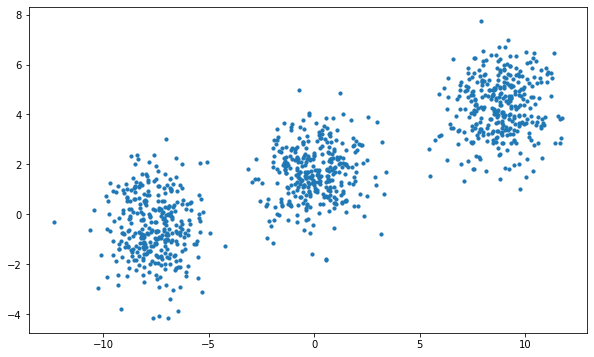

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.show()

In [4]:
def euclideanDistance(a,b,axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [45]:
k = 3
c_x = np.random.randint(0, np.max(data), size=k)
c_y = np.random.randint(0, np.max(data), size=k)

In [46]:
centroids = np.array([c_x, c_y]).T

In [47]:
centroids

array([[10,  4],
       [ 9,  4],
       [ 8,  1]])

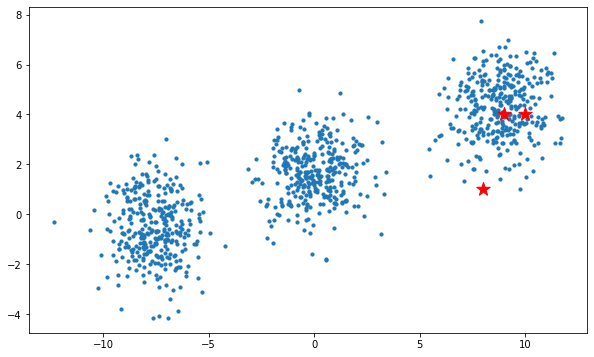

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.scatter(c_x, c_y, marker='*', s=200, c='red')
plt.show()

In [49]:
old_centroids = np.zeros_like(centroids)

In [50]:
old_centroids

array([[0, 0],
       [0, 0],
       [0, 0]])

In [51]:
clusters = np.zeros(len(data))

In [52]:
import time
def plotData(points, clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])
        #time.sleep(2)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
    plt.show()

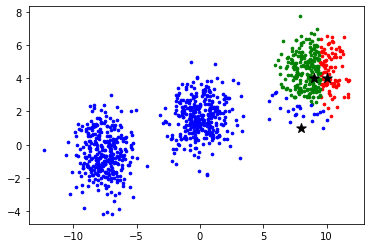

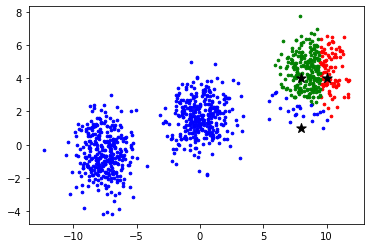

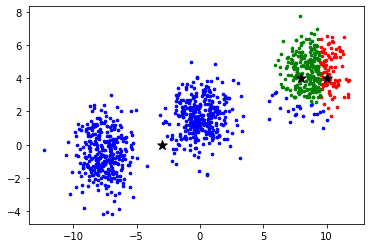

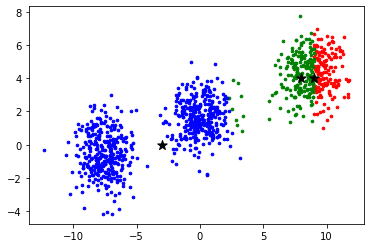

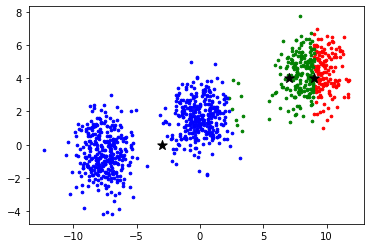

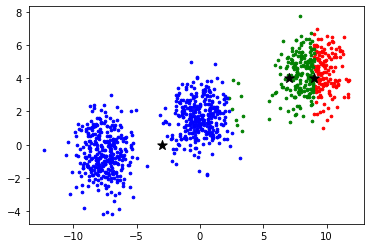

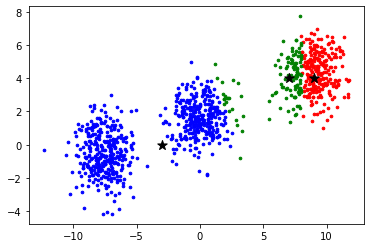

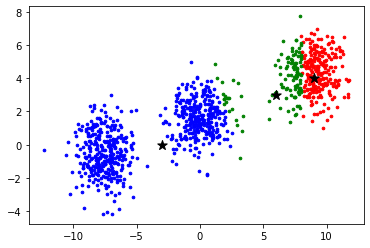

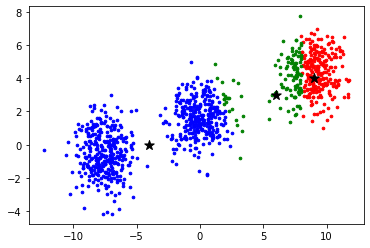

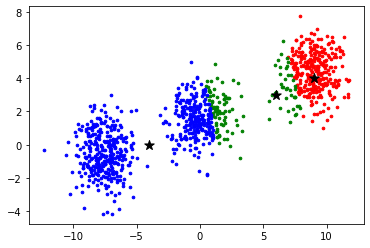

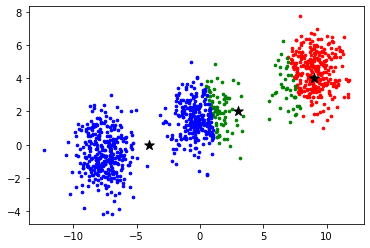

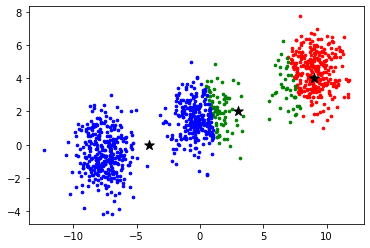

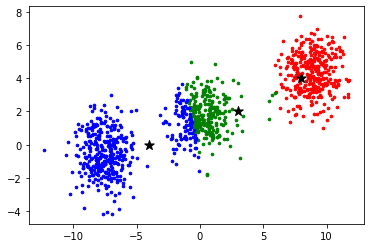

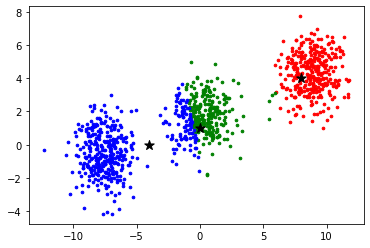

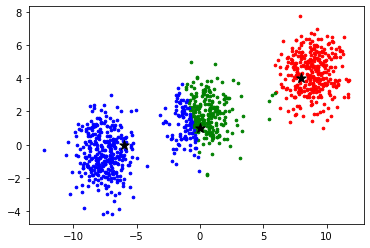

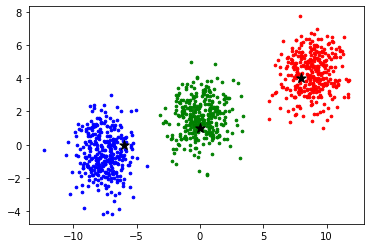

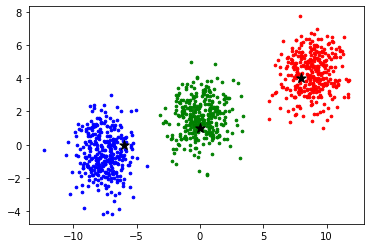

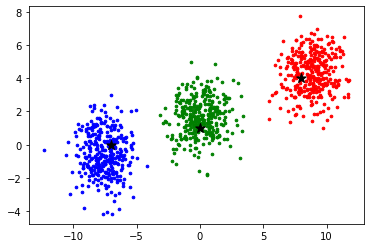

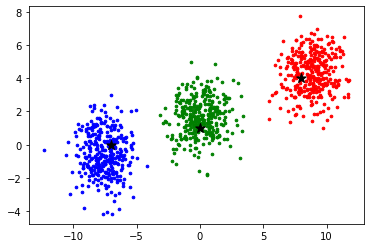

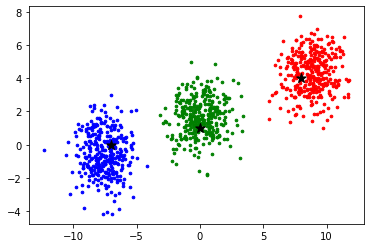

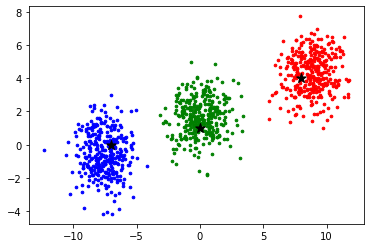

In [53]:
error = euclideanDistance(centroids, old_centroids, None)
while error != 0:
    for i in range(len(data)):
        dist = euclideanDistance(data[i], centroids)
        cluster = np.argmin(dist)
        clusters[i] = cluster
    old_centroids = deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData(points, clusters, centroids)
    error = euclideanDistance(centroids, old_centroids, None)